In [1]:
# Azure storage access info for open dataset diabetes
blob_account_name = "azureopendatastorage"
blob_container_name = "mlsamples"
blob_relative_path = "diabetes"
blob_sas_token = r"" # Blank since container is Anonymous access
    
# Set Spark config to access  blob storage
wasbs_path = f"wasbs://%s@%s.blob.core.windows.net/%s" % (blob_container_name, blob_account_name, blob_relative_path)
spark.conf.set("fs.azure.sas.%s.%s.blob.core.windows.net" % (blob_container_name, blob_account_name), blob_sas_token)
print("Remote blob path: " + wasbs_path)
    
# Spark read parquet, note that it won't load any data yet by now
df = spark.read.parquet(wasbs_path)


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 3, Finished, Available)

Remote blob path: wasbs://mlsamples@azureopendatastorage.blob.core.windows.net/diabetes


In [2]:
display(df)

StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, d1eeef8a-5ba0-44e7-aa04-31967b6e7ace)

In [3]:
df = df.toPandas()
df.head()

StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 5, Finished, Available)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
# Display the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Display the data types of each column
print("\nData types of columns:")
print(df.dtypes)

StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 7, Finished, Available)

Number of rows: 442
Number of columns: 11

Data types of columns:
AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object


In [6]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 8, Finished, Available)


Missing values per column:
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


In [7]:
df.describe()

StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 9, Finished, Available)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 10, Finished, Available)

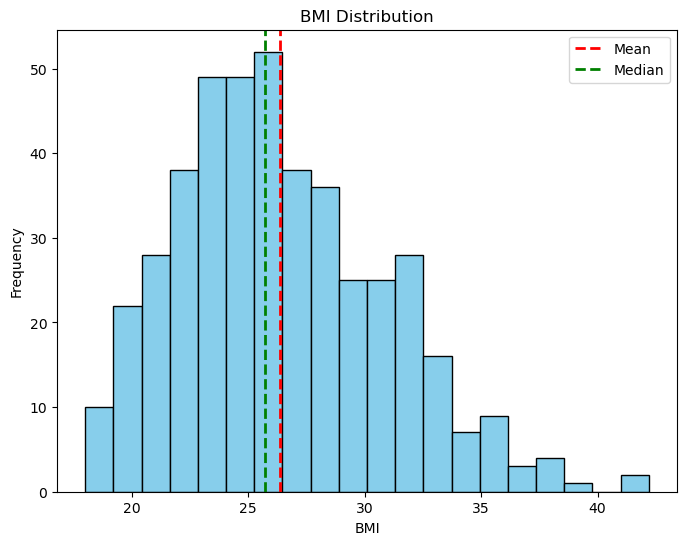

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
    
# Calculate the mean, median of the BMI variable
mean = df['BMI'].mean()
median = df['BMI'].median()
   
# Histogram of the BMI variable
plt.figure(figsize=(8, 6))
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
    
# Add lines for the mean and median
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    
# Add a legend
plt.legend()
plt.show()

StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 11, Finished, Available)

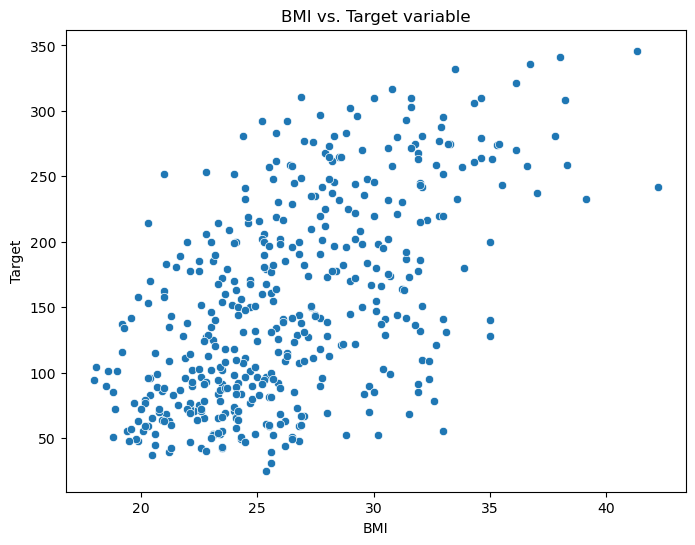

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Quantity vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Y', data=df)
plt.title('BMI vs. Target variable')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.show()


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 12, Finished, Available)

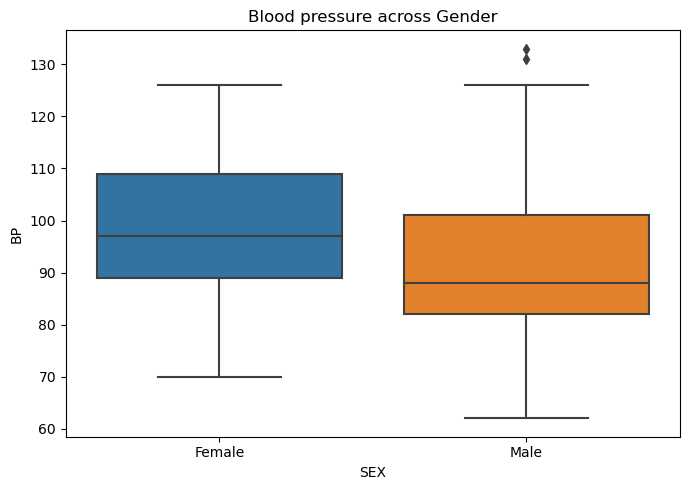

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
    
fig, ax = plt.subplots(figsize=(7, 5))
    
# Replace numeric values with labels
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})
    
sns.boxplot(x='SEX', y='BP', data=df, ax=ax)
ax.set_title('Blood pressure across Gender')
plt.tight_layout()
plt.show()


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 13, Finished, Available)

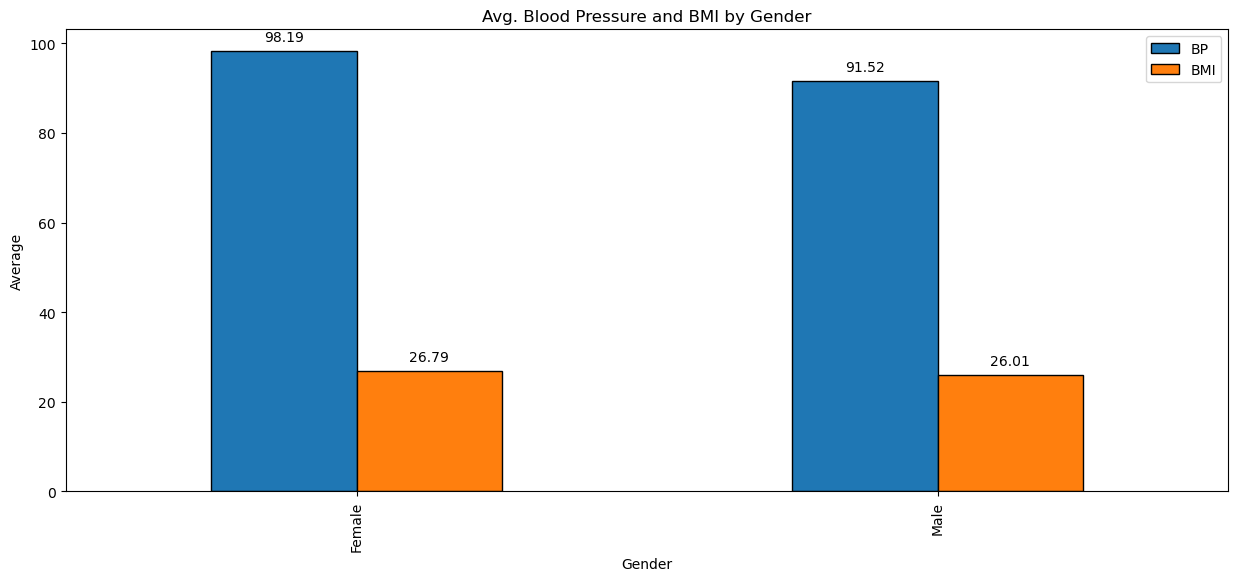

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
    
# Calculate average BP and BMI by SEX
avg_values = df.groupby('SEX')[['BP', 'BMI']].mean()
    
# Bar chart of the average BP and BMI by SEX
ax = avg_values.plot(kind='bar', figsize=(15, 6), edgecolor='black')
    
# Add title and labels
plt.title('Avg. Blood Pressure and BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('Average')
    
# Display actual numbers on the bar chart
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.show()


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 14, Finished, Available)

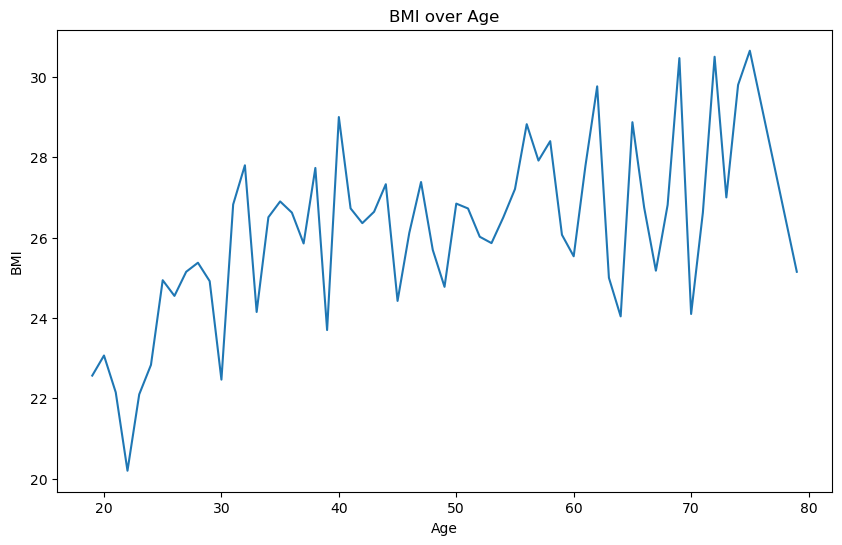

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
    
plt.figure(figsize=(10, 6))
sns.lineplot(x='AGE', y='BMI', data=df, errorbar=None)
plt.title('BMI over Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


In [13]:
df.corr(numeric_only=True)


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 15, Finished, Available)

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
BMI,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
Y,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


StatementMeta(, 746fb108-efaa-4391-8204-602f3a27d127, 16, Finished, Available)

<Axes: >

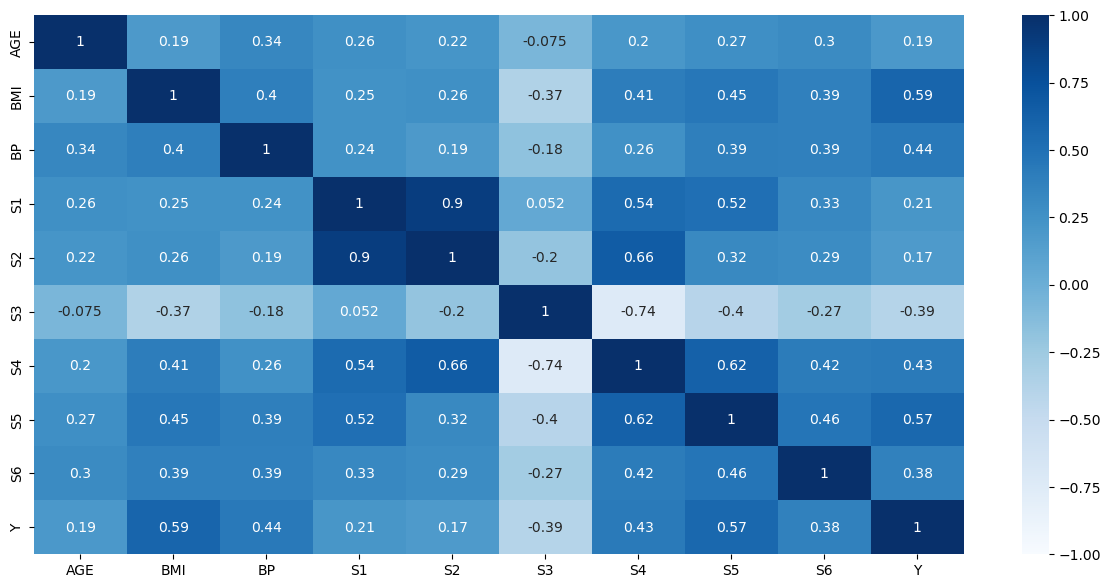

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="Blues")
